In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

plt.rcParams['figure.figsize'] = (16, 9)

# Carregando datasets

In [10]:
df_le1 = pd.read_csv('covariance_features_left_eye_10_30.csv', index_col=0)
df_re1 = pd.read_csv('covariance_features_right_eye_10_30.csv', index_col=0)
df_nt1 = pd.read_csv('covariance_features_nose_tip_10_30.csv', index_col=0)

df_le2 = pd.read_csv('left_inner_eye_10_30.csv', index_col=0)
df_re2 = pd.read_csv('right_inner_eye_10_30.csv', index_col=0)
df_nt2 = pd.read_csv('nose_tip_10_30.csv', index_col=0)

## Merge dos datasets: descritores da matriz de covariância com shape index e curvatura gaussiana

In [12]:
df_le = df_le2.join(df_le1[list(df_le1.columns[3:])])
df_le

,cloud,individuo,expression,type,radius_10_si,radius_10_cg,radius_15_si,radius_15_cg,radius_20_si,radius_20_cg,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
0,bs000_CR_RD_0.pcd,0,RD,CR,NaN,NaN,NaN,NaN,NaN,NaN,...,0.381120,445.262299,87.091820,-2377.278564,0.943242,0.403855,0.539388,0.037405,0.056757,0.331500
1,bs000_PR_SD_0.pcd,0,SD,PR,-0.649802,0.002419,-0.621523,0.001338,-0.557175,0.000351,...,0.068332,412.261292,80.705856,-2153.698730,0.942233,0.613210,0.329022,0.033416,0.057767,0.058866
2,bs000_LFAU_15_0.pcd,0,15,LFAU,-0.874963,0.003855,-0.778401,0.002116,-0.602172,0.000506,...,0.067855,409.573883,83.666969,-2133.431641,0.933933,0.568028,0.365906,0.038859,0.066067,0.043792
3,bs000_O_GLASSES_0.pcd,0,GLASSES,O,-0.836453,0.005631,-0.690748,0.001850,-0.594975,0.000386,...,0.076982,429.876251,85.543610,-2260.915771,0.938708,0.625586,0.313122,0.035061,0.061292,0.050543
4,bs000_UFAU_44_0.pcd,0,44,UFAU,-0.742564,0.002975,-0.669647,0.001680,-0.584724,0.000449,...,0.068653,433.804260,89.370628,-2280.005859,0.930669,0.638279,0.292390,0.039017,0.069331,0.042453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,104,34,LFAU,-0.764530,0.001931,-0.873185,0.001811,-0.671022,0.000670,...,0.091546,434.404724,88.658630,-2285.055908,0.932837,0.640569,0.292268,0.037840,0.067163,0.064082
4662,bs104_YR_R45_0.pcd,104,R45,YR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4663,bs104_LFAU_12R_0.pcd,104,12R,LFAU,-0.848378,0.001951,-0.882151,0.002198,-0.656109,0.000853,...,0.074054,429.422119,85.507248,-2255.883545,0.937450,0.680662,0.256789,0.034639,0.062550,0.056242
4664,bs104_PR_U_0.pcd,104,U,PR,-0.716534,0.001659,-0.919297,0.001604,-0.683610,0.000587,...,0.114770,429.677094,85.503098,-2257.811035,0.937751,0.673303,0.264449,0.034625,0.062249,0.085153


In [14]:
df_re = df_re2.join(df_re1[list(df_re1.columns[3:])])
df_re

,cloud,individuo,expression,type,radius_10_si,radius_10_cg,radius_15_si,radius_15_cg,radius_20_si,radius_20_cg,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
0,bs000_CR_RD_0.pcd,0,RD,CR,-0.668149,0.002145,-0.606723,0.001773,-0.555862,0.000660,...,0.011067,372.234741,79.128195,-1895.174072,0.922530,0.642008,0.280522,0.043112,0.077470,0.012038
1,bs000_PR_SD_0.pcd,0,SD,PR,-0.693110,0.003055,-0.626814,0.001789,-0.562927,0.000513,...,0.088511,409.226807,87.908299,-2125.318604,0.921769,0.535330,0.386439,0.046242,0.078231,0.056806
2,bs000_LFAU_15_0.pcd,0,15,LFAU,-0.763007,0.001978,-0.774985,0.001485,-0.625732,0.000812,...,0.085963,441.056580,101.601430,-2308.972168,0.898634,0.566618,0.332016,0.057290,0.101366,0.048933
3,bs000_O_GLASSES_0.pcd,0,GLASSES,O,-0.877781,0.004158,-0.642156,0.001637,-0.618728,0.000657,...,0.074571,444.294373,96.573858,-2336.041260,0.915291,0.670767,0.244523,0.046033,0.084709,0.047598
4,bs000_UFAU_44_0.pcd,0,44,UFAU,-0.713616,0.002899,-0.666126,0.001968,-0.578434,0.000515,...,0.072324,424.058807,90.718057,-2215.384521,0.921994,0.589629,0.332365,0.044686,0.078006,0.044605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,104,34,LFAU,-0.817295,0.001659,-0.902047,0.002076,-0.730123,0.000913,...,0.083322,422.042877,82.531910,-2213.432129,0.941888,0.645406,0.296482,0.032988,0.058112,0.070180
4662,bs104_YR_R45_0.pcd,104,R45,YR,-0.778784,0.002413,-0.784649,0.002507,-0.664744,0.001058,...,0.116418,396.505005,73.256983,-2056.414551,0.947915,0.846081,0.101833,0.026707,0.052085,0.100655
4663,bs104_LFAU_12R_0.pcd,104,12R,LFAU,-0.812453,0.002213,-0.888279,0.002304,-0.727001,0.000961,...,0.092350,431.800354,85.677881,-2272.777100,0.939058,0.639259,0.299799,0.034604,0.060942,0.072421
4664,bs104_PR_U_0.pcd,104,U,PR,-0.725727,0.001870,-0.911715,0.001907,-0.753778,0.000724,...,0.115979,434.115234,85.872521,-2286.691162,0.939181,0.665091,0.274090,0.034039,0.060819,0.091076


In [15]:
df_nt = df_nt2.join(df_nt1[list(df_nt1.columns[3:])])
df_nt

,cloud,individuo,expression,type,radius_10_si,radius_10_cg,radius_15_si,radius_15_cg,radius_20_si,radius_20_cg,...,gf09_r_25,gf01_r_30,gf02_r_30,gf03_r_30,gf04_r_30,gf05_r_30,gf06_r_30,gf07_r_30,gf08_r_30,gf09_r_30
0,bs000_LFAU_23_0.pcd,0,23,LFAU,-0.922822,0.011603,-0.917206,0.021499,-0.828631,0.026753,...,0.014179,251.114471,70.021821,-1154.587891,0.765857,0.182155,0.583702,0.141867,0.234143,0.024981
1,bs000_E_HAPPY_0.pcd,0,HAPPY,E,-0.998742,0.013932,-0.926328,0.021651,-0.870155,0.027017,...,0.018735,271.958862,81.127938,-1256.047852,0.668412,0.130081,0.538331,0.184908,0.331588,0.029849
2,bs000_UFAU_2_0.pcd,0,2,UFAU,-0.962472,0.015505,-0.947179,0.023744,-0.867928,0.029363,...,0.011649,274.157104,81.696372,-1269.098633,0.659558,0.094547,0.565011,0.191752,0.340442,0.025223
3,bs000_N_N_1.pcd,0,N,N,-0.921193,0.013208,-0.915946,0.022873,-0.848495,0.029487,...,0.007873,269.660400,79.231875,-1247.277344,0.688240,0.117953,0.570288,0.179021,0.311760,0.020142
4,bs000_LFAU_14_0.pcd,0,14,LFAU,-0.942731,0.012916,-0.919468,0.022373,-0.855276,0.029265,...,0.003972,268.620850,80.270990,-1236.770752,0.667460,0.137309,0.530151,0.184500,0.332540,0.032410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,bs104_LFAU_34_0.pcd,104,34,LFAU,NaN,NaN,NaN,NaN,NaN,NaN,...,0.033342,297.665680,81.483985,-1424.952393,0.777287,0.154493,0.622794,0.139203,0.222713,0.020534
4662,bs104_YR_R45_0.pcd,104,R45,YR,-0.667281,0.003735,-0.640302,0.003719,-0.615882,0.001089,...,0.000964,220.258423,55.227114,-1001.297180,0.851462,0.227625,0.623837,0.097421,0.148538,0.003737
4663,bs104_LFAU_12R_0.pcd,104,12R,LFAU,NaN,NaN,NaN,NaN,NaN,NaN,...,0.029535,266.999847,77.995591,-1232.966675,0.709557,0.171077,0.538479,0.165782,0.290443,0.054350
4664,bs104_PR_U_0.pcd,104,U,PR,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004970,265.378845,74.689240,-1232.987671,0.753638,0.168432,0.585206,0.148308,0.246362,0.006188


- si Shape Index
- cg Curvatura Gaussiana
- gf01 Somatório: λ1 + λ2 + λ3
- gf02 Omnivariância: (λ1 * λ2 * λ3) ^ 1/3
- gf03 Autoentropia: Somatório i=1 λi * ln(λi)
- gf04 Anisotropia: (λ1 − λ3) / λ1
- gf05 Planaridade: (λ2 − λ3) / λ1
- gf06 Linearidade: (λ1 − λ2) / λ1
- gf07 Variação de superfı́cie: λ3 / (λ1 + λ2 + λ3)
- gf08 Esfericidade: λ3 / λ1
- gf09 Verticalidade: 1 − |<[0 0 1], e3>|

In [16]:
columns = list(df_le1.columns[3:])
features = ['Somatório', 'Omnivariância', 'Autoentropia',
            'Anisotropia', 'Planaridade', 'Linearidade',
            'Variação de Superfície', 'Esfericidade', 'Verticalidade']
colors = ['blue', 'cyan', 'green', 'red', 'brown']
labels = ['Raio 10', 'Raio 15', 'Raio 20', 'Raio 25', 'Raio 30']

In [51]:
def plot_histograms(df,  point_name, figname, radius=10, expression=None):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    cols = [f'gf01_r_{radius}', f'gf02_r_{radius}', f'gf03_r_{radius}',
            f'gf04_r_{radius}', f'gf05_r_{radius}', f'gf06_r_{radius}',
            f'gf07_r_{radius}', f'gf08_r_{radius}', f'gf09_r_{radius}']

    if expression is not None:
        df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, column in enumerate(cols):
        df.hist(ax=axes[i, j], column=[column], bins=10)
        axes[i, j].set_title(features[index])
        j += 1
        if j == 3:
            i += 1
            j = 0

    expression = '' if expression is None else f' - Expressão: {expression}'
#     title = f'Histogramas - {point_name} - Raio: {radius} {expression}'
#     fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.9, wspace=0.25, hspace=0.25)
    
    plt.savefig(figname)
    
    plt.show()

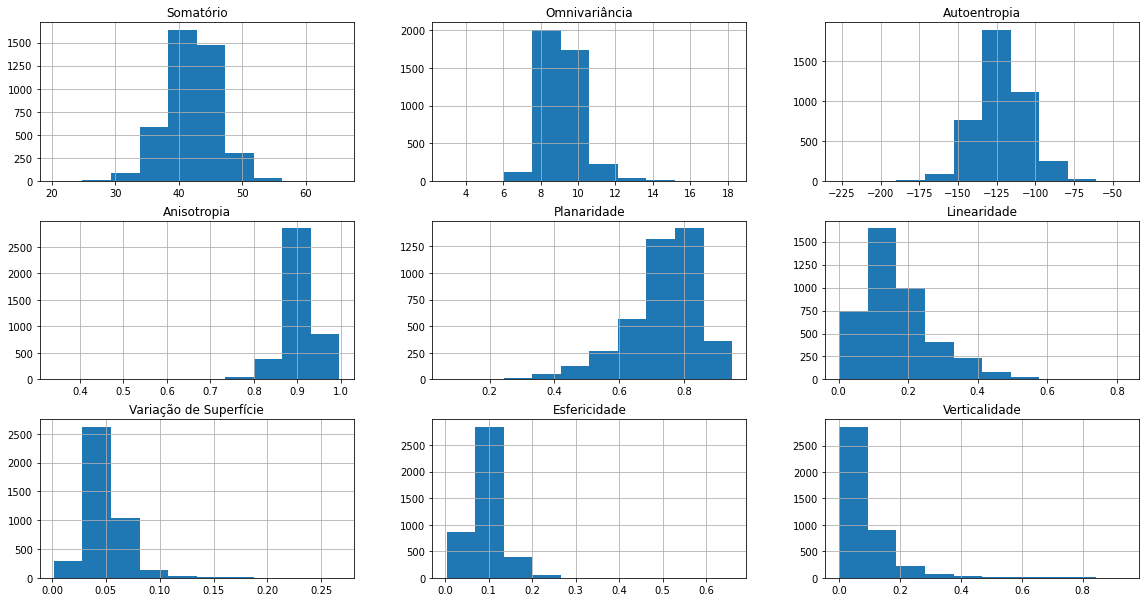

In [53]:
plot_histograms(df_le, '', 'olho-esquerdo-raio-10.pdf', radius=10)

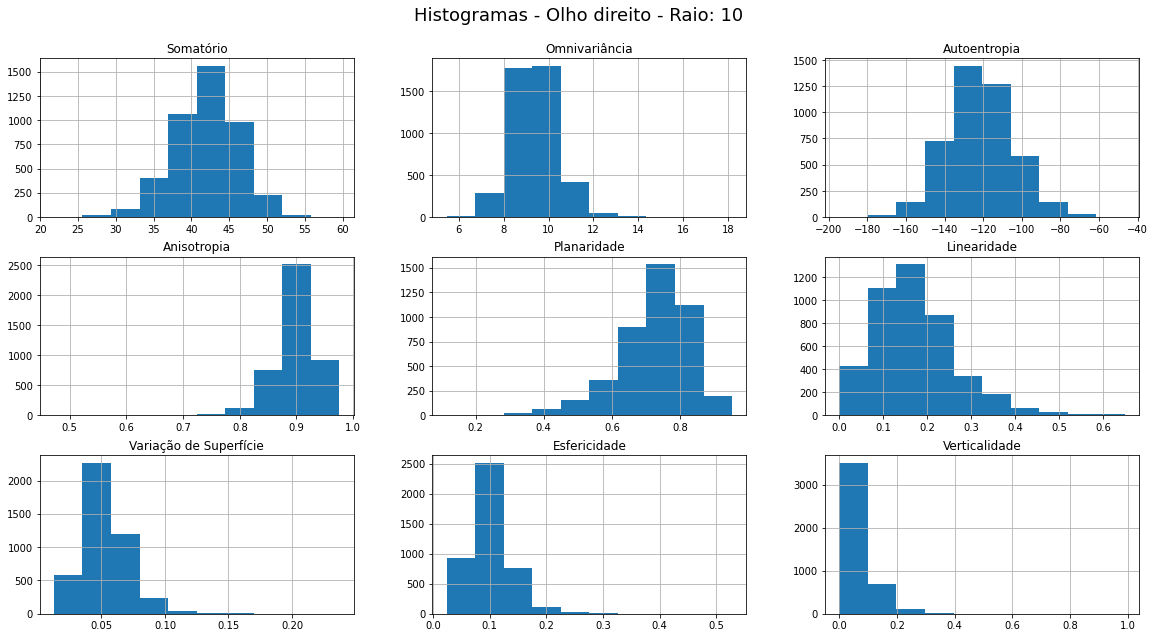

In [47]:
plot_histograms(df_re, point_name='Olho direito', radius=10)

In [62]:
def plot_histograms_si_gc(df,  point_name, figname, radius=10, expression=None):
    nrows, ncols = 1, 2
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    cols = [f'radius_{radius}_si', f'radius_{radius}_cg']
    features = ['Índice de Forma', 'Curvatura Gaussiana']

    if expression is not None:
        df = df.loc[df['expression'] == expression]

    for index, column in enumerate(cols):
        df.hist(ax=axes[index], column=[column], bins=10)
        axes[index].set_title(features[index])

    expression = '' if expression is None else f' - Expressão: {expression}'
#     title = f'Histogramas - {point_name} - Raio: {radius} {expression}'
#     fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.9, wspace=0.25, hspace=0.25)
    
    plt.savefig(figname)
    
    plt.show()

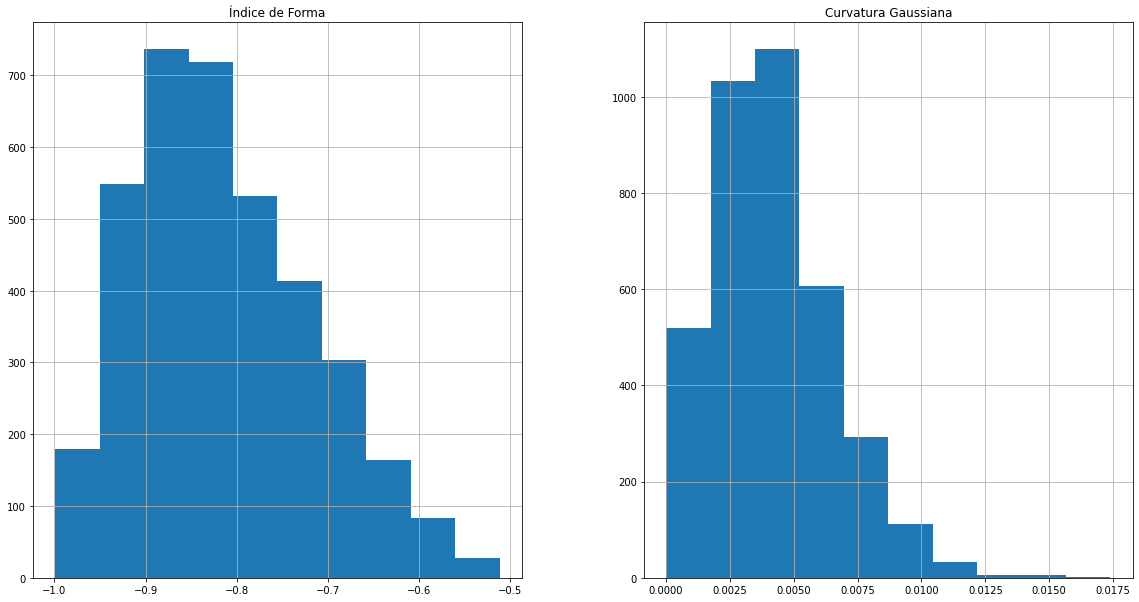

In [65]:
plot_histograms_si_gc(df_le, '', 'shape-e-curvatura.pdf')

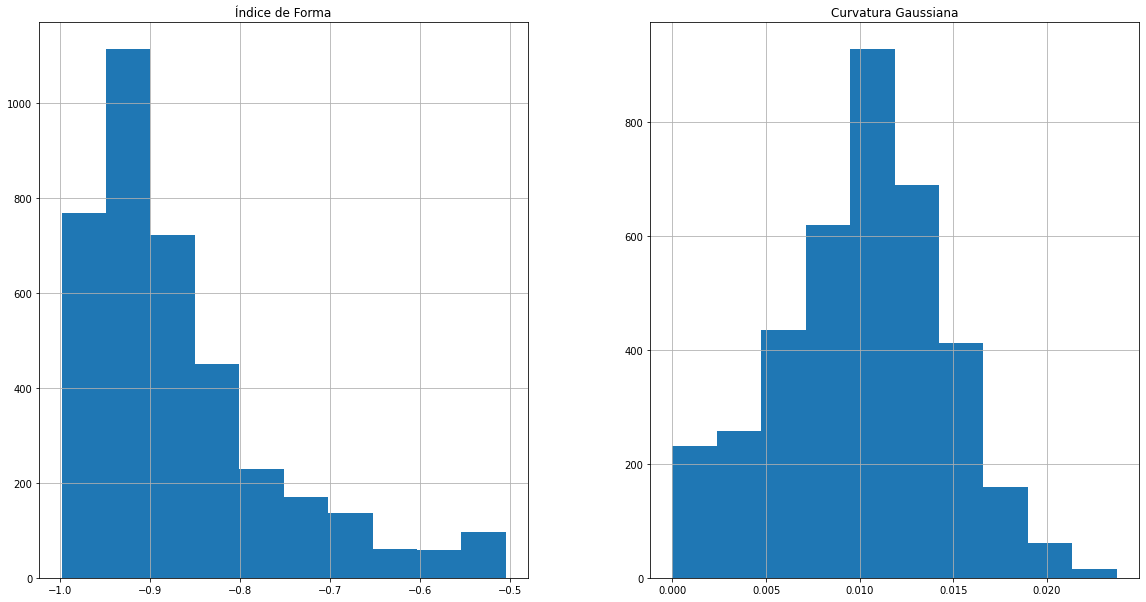

In [64]:
plot_histograms_si_gc(df_nt, '', '')

In [17]:
def plot_histograms_together(df, title='', save=False, filename=''):    
    colsNames = []
    for i in range(len(features)):
        aux = []
        for i in np.arange(i, len(columns), len(features)):
            aux.append(columns[i])
        colsNames.append(aux)

    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    i, j = 0, 0 # refactor
    for index, col in enumerate(colsNames):
        for c in col:
            axes[i, j].hist(df[c], bins=10, alpha=1)
        axes[i, j].set_title(features[index])
        axes[i, j].legend(labels)
        j += 1
        if j == 3:
            i += 1
            j = 0

    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.9, wspace=0.25, hspace=0.25)
    
    if save:
        plt.savefig(filename)
    
    plt.show()

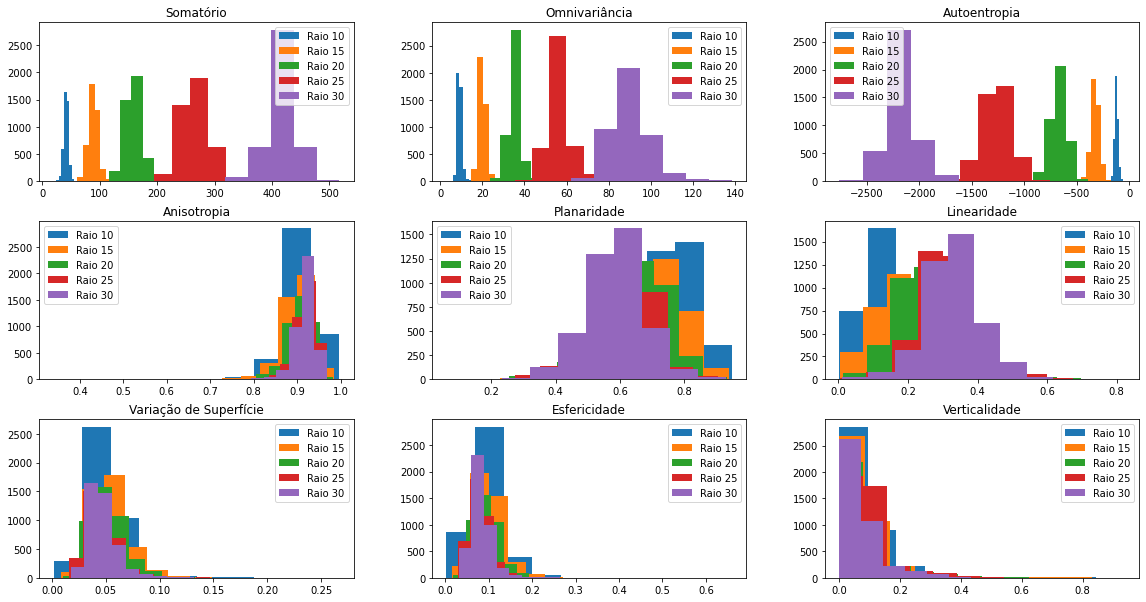

In [43]:
plot_histograms_together(df_le1, save=True, filename='histograma_olho_esquerdo.pdf')

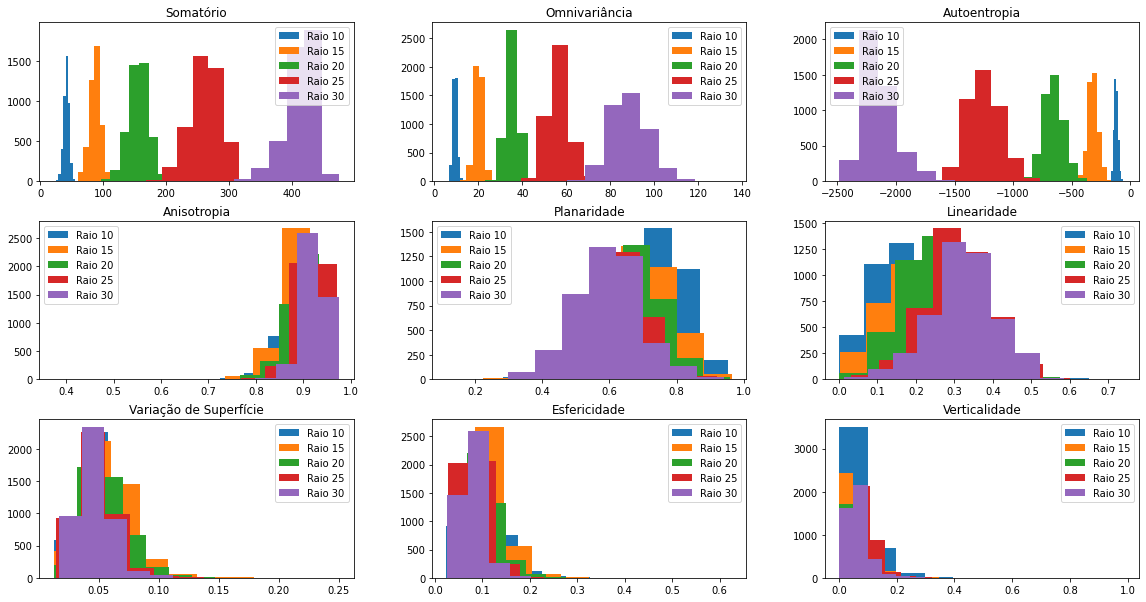

In [19]:
plot_histograms_together(df_re1, save=False, filename='histograma_olho_esquerdo.pdf')

In [20]:
# https://stackoverflow.com/questions/45079601/how-can-i-get-gini-coefficient-in-sklearn
def gini(data):
    x = np.array(data, dtype=np.float32)
    n = len(data)
    diffs = sum(abs(i - j) for i, j in combinations(x, r=2))

    return diffs / (2 * n**2 * data.mean())

def calculate_gini_from_histogram(df, column):
    hist, _ = np.histogram(df[column].dropna().values, bins=10)

    return gini(hist)

def calculate_ginis(df, columns, features):
    colsNames = []
    for i in range(len(features)):
        aux = []
        for i in np.arange(i, len(columns), len(features)):
            aux.append(columns[i])
        colsNames.append(aux)

    data = []
    for i, column in enumerate(colsNames):
        ginis = []
        for j, col in enumerate(column):
            ginis.append(calculate_gini_from_histogram(df, col))
        data.append(ginis)

    return data

In [21]:
radius = pd.DataFrame(data={'Raio': [label.split(' ')[-1] for label in labels]})

def create_gini_table(df, columns, features):
    data = calculate_ginis(df, columns, features)
    return pd.concat([radius, pd.DataFrame(np.transpose(data), columns=features)], axis=1)

In [22]:
df_gini_le1 = create_gini_table(df_le1, columns, features)
df_gini_le1

,Raio,Somatório,Omnivariância,Autoentropia,Anisotropia,Planaridade,Linearidade,Variação de Superfície,Esfericidade,Verticalidade
0,10,0.348215,0.381090,0.353521,0.406199,0.311553,0.322672,0.395128,0.406199,0.399083
1,15,0.352098,0.385818,0.354342,0.371394,0.280391,0.266233,0.361577,0.371394,0.394597
2,20,0.368234,0.397299,0.365943,0.333647,0.283285,0.283430,0.332176,0.333647,0.379209
3,25,0.367583,0.386614,0.356199,0.352388,0.305258,0.314954,0.329378,0.352388,0.373107
4,30,0.395755,0.362856,0.393439,0.375350,0.327135,0.328751,0.341727,0.375350,0.392354


In [23]:
df_gini_re1 = create_gini_table(df_re1, columns, features)
df_gini_re1

,Raio,Somatório,Omnivariância,Autoentropia,Anisotropia,Planaridade,Linearidade,Variação de Superfície,Esfericidade,Verticalidade
0,10,0.315505,0.362752,0.309702,0.381743,0.307867,0.284014,0.372339,0.381743,0.425573
1,15,0.329656,0.376789,0.323005,0.394472,0.289312,0.258394,0.370183,0.394472,0.381835
2,20,0.322294,0.386101,0.316720,0.368830,0.290734,0.297271,0.347569,0.368830,0.363486
3,25,0.332729,0.379679,0.328394,0.390436,0.291422,0.305482,0.370780,0.390436,0.367867
4,30,0.364725,0.329151,0.362959,0.401468,0.298853,0.281422,0.374839,0.401468,0.379243


In [24]:
df_gini_nt1 = create_gini_table(df_nt1, columns, features)
df_gini_nt1

,Raio,Somatório,Omnivariância,Autoentropia,Anisotropia,Planaridade,Linearidade,Variação de Superfície,Esfericidade,Verticalidade
0,10,0.376255,0.409953,0.376641,0.414157,0.307100,0.336808,0.402617,0.414157,0.411390
1,15,0.384170,0.390776,0.387387,0.315959,0.289961,0.309331,0.323874,0.315959,0.429193
2,20,0.376963,0.379880,0.387066,0.286079,0.256113,0.222716,0.299228,0.286079,0.435628
3,25,0.350086,0.367074,0.349142,0.247426,0.292299,0.228185,0.267568,0.247426,0.432068
4,30,0.363085,0.359738,0.358280,0.278979,0.336937,0.307422,0.270506,0.278979,0.414178


In [25]:
df_gini_le2 = create_gini_table(df_le2, df_le2.columns[4:], ['Índice de Forma', 'Curvatura Gaussiana'])
df_gini_le2

,Raio,Índice de Forma,Curvatura Gaussiana
0,10,0.187729,0.293015
1,15,0.233468,0.358792
2,20,0.313835,0.447276
3,25,0.190804,0.446953
4,30,0.221575,0.446872


In [26]:
df_gini_re2 = create_gini_table(df_re2, df_re2.columns[4:], ['Índice de Forma', 'Curvatura Gaussiana'])
df_gini_re2

,Raio,Índice de Forma,Curvatura Gaussiana
0,10,0.188509,0.330810
1,15,0.221765,0.334986
2,20,0.310927,0.436088
3,25,0.186792,0.446259
4,30,0.207366,0.336651


In [27]:
df_gini_nt2 = create_gini_table(df_nt2, df_nt2.columns[4:], ['Índice de Forma', 'Curvatura Gaussiana'])
df_gini_nt2

,Raio,Índice de Forma,Curvatura Gaussiana
0,10,0.244170,0.205830
1,15,0.198109,0.200525
2,20,0.200551,0.250236
3,25,0.214443,0.239286
4,30,0.223188,0.313209


In [28]:
df_gini_le = df_gini_le2.join(df_gini_le1[list(df_gini_le1.columns[1:])])
df_gini_le

,Raio,Índice de Forma,Curvatura Gaussiana,Somatório,Omnivariância,Autoentropia,Anisotropia,Planaridade,Linearidade,Variação de Superfície,Esfericidade,Verticalidade
0,10,0.187729,0.293015,0.348215,0.381090,0.353521,0.406199,0.311553,0.322672,0.395128,0.406199,0.399083
1,15,0.233468,0.358792,0.352098,0.385818,0.354342,0.371394,0.280391,0.266233,0.361577,0.371394,0.394597
2,20,0.313835,0.447276,0.368234,0.397299,0.365943,0.333647,0.283285,0.283430,0.332176,0.333647,0.379209
3,25,0.190804,0.446953,0.367583,0.386614,0.356199,0.352388,0.305258,0.314954,0.329378,0.352388,0.373107
4,30,0.221575,0.446872,0.395755,0.362856,0.393439,0.375350,0.327135,0.328751,0.341727,0.375350,0.392354


In [29]:
df_gini_re = df_gini_re2.join(df_gini_re1[list(df_gini_re1.columns[1:])])
df_gini_re

,Raio,Índice de Forma,Curvatura Gaussiana,Somatório,Omnivariância,Autoentropia,Anisotropia,Planaridade,Linearidade,Variação de Superfície,Esfericidade,Verticalidade
0,10,0.188509,0.330810,0.315505,0.362752,0.309702,0.381743,0.307867,0.284014,0.372339,0.381743,0.425573
1,15,0.221765,0.334986,0.329656,0.376789,0.323005,0.394472,0.289312,0.258394,0.370183,0.394472,0.381835
2,20,0.310927,0.436088,0.322294,0.386101,0.316720,0.368830,0.290734,0.297271,0.347569,0.368830,0.363486
3,25,0.186792,0.446259,0.332729,0.379679,0.328394,0.390436,0.291422,0.305482,0.370780,0.390436,0.367867
4,30,0.207366,0.336651,0.364725,0.329151,0.362959,0.401468,0.298853,0.281422,0.374839,0.401468,0.379243


In [30]:
df_gini_nt = df_gini_nt2.join(df_gini_nt1[list(df_gini_nt1.columns[1:])])
df_gini_nt

,Raio,Índice de Forma,Curvatura Gaussiana,Somatório,Omnivariância,Autoentropia,Anisotropia,Planaridade,Linearidade,Variação de Superfície,Esfericidade,Verticalidade
0,10,0.244170,0.205830,0.376255,0.409953,0.376641,0.414157,0.307100,0.336808,0.402617,0.414157,0.411390
1,15,0.198109,0.200525,0.384170,0.390776,0.387387,0.315959,0.289961,0.309331,0.323874,0.315959,0.429193
2,20,0.200551,0.250236,0.376963,0.379880,0.387066,0.286079,0.256113,0.222716,0.299228,0.286079,0.435628
3,25,0.214443,0.239286,0.350086,0.367074,0.349142,0.247426,0.292299,0.228185,0.267568,0.247426,0.432068
4,30,0.223188,0.313209,0.363085,0.359738,0.358280,0.278979,0.336937,0.307422,0.270506,0.278979,0.414178


In [37]:
gini_columns = ['Raio', 'IF', 'CG', 'GF1', 'GF2', 'GF3', 'GF4', 'GF5', 'GF6', 'GF7', 'GF8', 'GF9']

In [38]:
ginile = df_gini_le.round(3)
ginile.columns = gini_columns
ginile.to_latex('gini_table_left_eye.tex', index=False, decimal=',')

In [41]:
ginire = df_gini_re.round(3)
ginire.columns = gini_columns
ginire.to_latex('gini_table_right_eye.tex', index=False, decimal=',')

In [42]:
ginint = df_gini_nt.round(3)
ginint.columns = gini_columns
ginint.to_latex('gini_table_nose_tip.tex', index=False, decimal=',')

In [34]:
def plot_scatterplot_together(dfl, dfr, dfn, column, expression=None, title='', save=False, filename=''):
    nrows, ncols = 3, 3
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    dfl.columns = dfr.columns = dfn.columns = features

    i, j = 0, 0 # refactor
    for index, col in enumerate(dfl.columns):
        dfl.plot.scatter(ax=axes[i, j], x=column, y=col, c='r', label='Olho esquerdo')
        dfr.plot.scatter(ax=axes[i, j], x=column, y=col, c='g', label='Olho direito')
        dfn.plot.scatter(ax=axes[i, j], x=column, y=col, c='b', label='Ponta do nariz')
        axes[i, j].legend(loc='upper right')
        j += 1
        if j == 3:
            i += 1
            j = 0

    fig.suptitle(title, fontsize=18)
    plt.subplots_adjust(top=0.95, wspace=0.25, hspace=0.25)
    
    if save:
        plt.savefig(filename)
    
    plt.show()

In [35]:
# helper datasets

# left eye
dfr10_le = df_le1.iloc[:,3:12]
dfr15_le = df_le1.iloc[:,12:21]
dfr20_le = df_le1.iloc[:,21:30]
dfr25_le = df_le1.iloc[:,30:39]
dfr30_le = df_le1.iloc[:,39:48]

# right eye
dfr10_re = df_re1.iloc[:,3:12]
dfr15_re = df_re1.iloc[:,12:21]
dfr20_re = df_re1.iloc[:,21:30]
dfr25_re = df_re1.iloc[:,30:39]
dfr30_re = df_re1.iloc[:,39:48]

# rose tip
dfr10_nt = df_nt1.iloc[:,3:12]
dfr15_nt = df_nt1.iloc[:,12:21]
dfr20_nt = df_nt1.iloc[:,21:30]
dfr25_nt = df_nt1.iloc[:,30:39]
dfr30_nt = df_nt1.iloc[:,39:48]

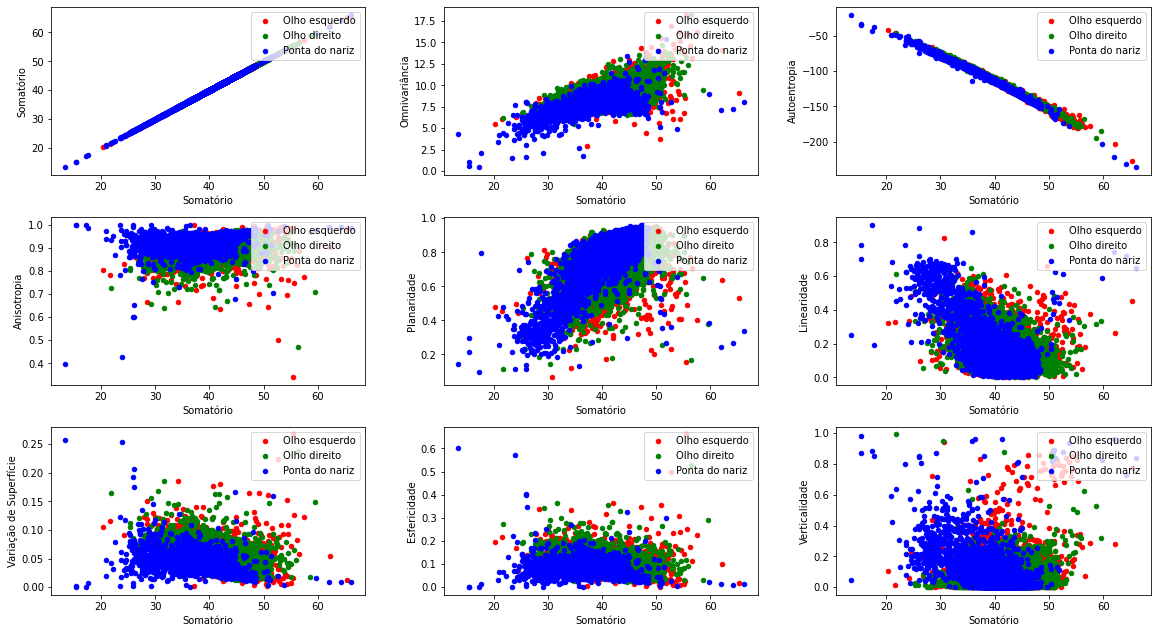

In [36]:
plot_scatterplot_together(dfr10_le, dfr10_re, dfr10_nt, 'Somatório', save=True, filename='dispersao_somatorio.pdf')